# Classification 5

We will discuss ensemble methods, particularly for decision trees.

In [1]:
from pandas import Series, DataFrame
import pandas as pd
from patsy import dmatrices
%pylab inline
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


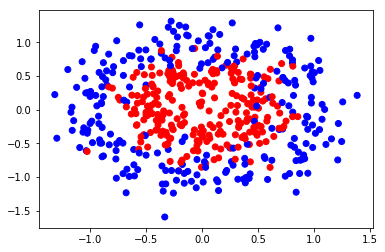

In [2]:
from sklearn.datasets import make_circles
X, y = make_circles(500, noise=0.2, factor=0.5, random_state=1)
fig = scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
savefig('Classification_5_data/twocircles.png')

In [3]:
def plot_decisions(model, ax):
    stepsize = 0.01
    r = np.arange(-2.0, 2.0, stepsize)
    xx, yy = np.meshgrid(r, r)
    preds = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)
    ax.contourf(xx, yy, preds, cmap='bwr', alpha=.8)

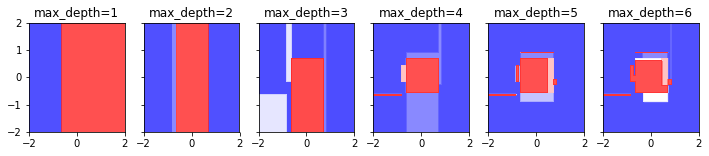

In [4]:
from sklearn import tree
depths = [1, 2, 3, 4, 5, 6]
fig, axes = subplots(nrows=1, ncols=len(depths), sharey=True, figsize=(12, 2))

for idx, d in enumerate(depths):
    model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=d)
    model.fit(X, y)
    plot_decisions(model, axes[idx])
    axes[idx].set_title('max_depth='+str(d))
savefig('Classification_5_data/alldepths.png')

## Bagging

In [5]:
from sklearn.ensemble import BaggingClassifier

In [6]:
bagging = BaggingClassifier(tree.DecisionTreeClassifier(criterion='entropy'), random_state=1)

In [7]:
bagging.fit(X, y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=None, oob_score=False,
         random_state=1, verbose=0, warm_start=False)

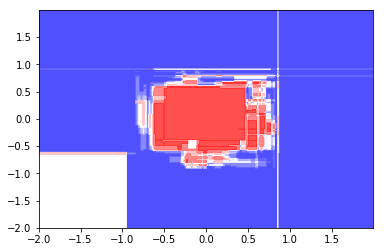

In [8]:
fig, ax = subplots(nrows=1, ncols=1)
plot_decisions(bagging, ax)
savefig('Classification_5_data/bagging.png')

In [9]:
# bagging.estimators_ contains the list of all the decision trees
from StringIO import StringIO
import pydot_ng
dot_data = StringIO()
tree.export_graphviz(bagging.estimators_[0], out_file=dot_data)
pydot_ng.graph_from_dot_data(dot_data.getvalue()).write_png('Classification_5_data/bagging_est0.png')

True

![Bagged decision tree 0](Classification_5_data/bagging_est0.png)

### Random Forests

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
model_rf = RandomForestClassifier(n_estimators=10, random_state=1)
model_rf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

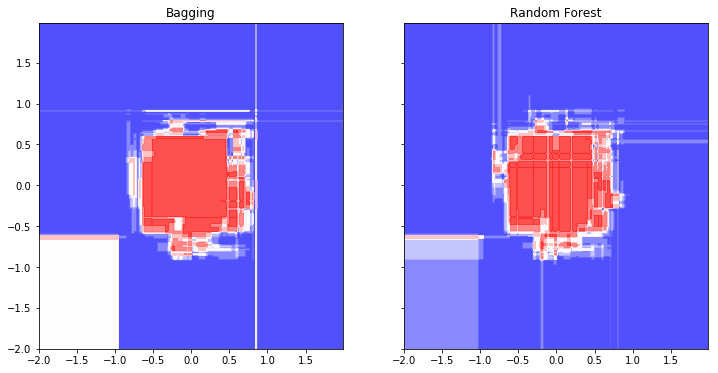

In [12]:
fig, (ax1, ax2) = subplots(nrows=1, ncols=2, sharey=True, figsize=(12,6))
plot_decisions(bagging, ax1)
ax1.set_title('Bagging')
plot_decisions(model_rf, ax2)
ax2.set_title('Random Forest')
savefig('Classification_5_data/random_forest.png')

In this case, there was no particularly important feature, so the random forest predictions look pretty similar to the bagging classifier's predictions.

## Gradient Boosted Decision Tree

In [13]:
from sklearn.ensemble import GradientBoostingClassifier

In [14]:
boosted_tree = GradientBoostingClassifier(n_estimators=100, random_state=1)
boosted_tree.fit(X, y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=1,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

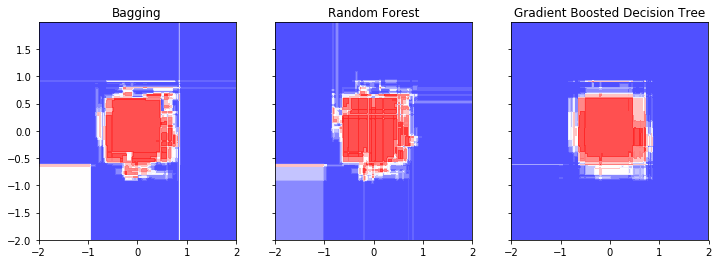

In [15]:
fig, (ax1, ax2, ax3) = subplots(nrows=1, ncols=3, sharey=True, figsize=(12,4))
plot_decisions(bagging, ax1)
ax1.set_title('Bagging')
plot_decisions(model_rf, ax2)
ax2.set_title('Random Forest')
plot_decisions(boosted_tree, ax3)
ax3.set_title('Gradient Boosted Decision Tree')
savefig('Classification_5_data/all.png')

## Example: Spam classification

We will try out these three ensemble methods for spam classification (data [here](https://archive.ics.uci.edu/ml/datasets/Spambase)).

In [16]:
names = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our',
         'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail',
         'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses',
         'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit',
         'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl',
         'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
         'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology',
         'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 'word_freq_cs',
         'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re', 'word_freq_edu',
         'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!',
         'char_freq_$', 'char_freq_#', 'capital_run_length_average', 'capital_run_length_longest',
         'capital_run_length_total', 'is_spam']
df = pd.read_csv('Classification_5_data/spambase.csv', header=None, names=names)

In [17]:
df.iloc[0]

word_freq_make                  0.000
word_freq_address               0.640
word_freq_all                   0.640
word_freq_3d                    0.000
word_freq_our                   0.320
word_freq_over                  0.000
word_freq_remove                0.000
word_freq_internet              0.000
word_freq_order                 0.000
word_freq_mail                  0.000
word_freq_receive               0.000
word_freq_will                  0.640
word_freq_people                0.000
word_freq_report                0.000
word_freq_addresses             0.000
word_freq_free                  0.320
word_freq_business              0.000
word_freq_email                 1.290
word_freq_you                   1.930
word_freq_credit                0.000
word_freq_your                  0.960
word_freq_font                  0.000
word_freq_000                   0.000
word_freq_money                 0.000
word_freq_hp                    0.000
word_freq_hpl                   0.000
word_freq_ge

### Create design matrices

In [18]:
formula = 'is_spam ~ ' + ' + '.join(['Q("'+x+'")' for x in df.columns.values[:-1]])
print formula

is_spam ~ Q("word_freq_make") + Q("word_freq_address") + Q("word_freq_all") + Q("word_freq_3d") + Q("word_freq_our") + Q("word_freq_over") + Q("word_freq_remove") + Q("word_freq_internet") + Q("word_freq_order") + Q("word_freq_mail") + Q("word_freq_receive") + Q("word_freq_will") + Q("word_freq_people") + Q("word_freq_report") + Q("word_freq_addresses") + Q("word_freq_free") + Q("word_freq_business") + Q("word_freq_email") + Q("word_freq_you") + Q("word_freq_credit") + Q("word_freq_your") + Q("word_freq_font") + Q("word_freq_000") + Q("word_freq_money") + Q("word_freq_hp") + Q("word_freq_hpl") + Q("word_freq_george") + Q("word_freq_650") + Q("word_freq_lab") + Q("word_freq_labs") + Q("word_freq_telnet") + Q("word_freq_857") + Q("word_freq_data") + Q("word_freq_415") + Q("word_freq_85") + Q("word_freq_technology") + Q("word_freq_1999") + Q("word_freq_parts") + Q("word_freq_pm") + Q("word_freq_direct") + Q("word_freq_cs") + Q("word_freq_meeting") + Q("word_freq_original") + Q("word_freq_

The **Q()** function stands for _quoting_, and is necessary when you have features like **char\_freq\_(**, in which the parenthesis throws off the _dmatrices()_ function. **Q("char\_freq\_(")** tells Python to consider the entire thing as a string.

In [19]:
Y, X = dmatrices(formula, df, return_type='dataframe')
y = Y['is_spam'].values

## Create training and testing sets

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Set up all the classifiers

In [21]:
# All the models we want to test out, in one list.
model_list = [('Decision Tree', tree.DecisionTreeClassifier(criterion='entropy')),
              ('Bagging', BaggingClassifier(tree.DecisionTreeClassifier(criterion='entropy'), random_state=1)),
              ('Random Forest', RandomForestClassifier(n_estimators=10, random_state=1)),
              ('Gradient Boosting', GradientBoostingClassifier(n_estimators=200, max_depth=4, random_state=1))]

## Fit the models

In [22]:
for (name, model) in model_list:
    print 'Fitting', name
    model.fit(X_train, y_train)

Fitting Decision Tree
Fitting Bagging
Fitting Random Forest
Fitting Gradient Boosting


## Accuracy scores

In [23]:
from sklearn import metrics

accuracy_train = {}
accuracy_test = {}
for (name, model) in model_list:
    prediction_train = model.predict(X_train)
    accuracy_train[name] = metrics.accuracy_score(y_train, prediction_train)
    prediction_test = model.predict(X_test)
    accuracy_test[name] = metrics.accuracy_score(y_test, prediction_test)
    
df = DataFrame({'Training Accuracy':accuracy_train, 'Test Accuracy':accuracy_test})
df

,Test Accuracy,Training Accuracy
Bagging,0.947864,0.995963
Decision Tree,0.926865,0.999689
Gradient Boosting,0.955105,0.988509
Random Forest,0.946416,0.995963


All the classifiers (except perhaps Gradient Boosted Decision Trees) seem to overfit; their training accuracy is much higher than their test accuracy.

How does accuracy of gradient boosting depend on the number of trees and their depth?

Text(0,0.5,'Test accuracy')

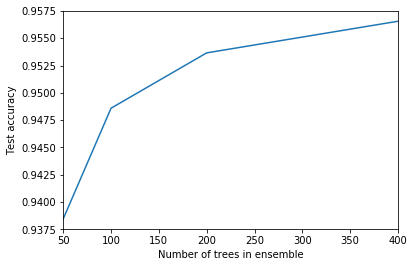

In [24]:
scores = {}
for num_trees in [50, 100, 200, 300, 400]:
    model = GradientBoostingClassifier(n_estimators=num_trees, max_depth=2, random_state=1)
    model.fit(X_train, y_train)
    prediction_test = model.predict(X_test)
    accuracy_test = metrics.accuracy_score(y_test, prediction_test)
    scores[num_trees] = accuracy_test
Series(scores).sort_index().plot()
xlabel('Number of trees in ensemble')
ylabel('Test accuracy')

200 trees seem to be enough.

How about the depth of the trees?

Text(0,0.5,'Test accuracy')

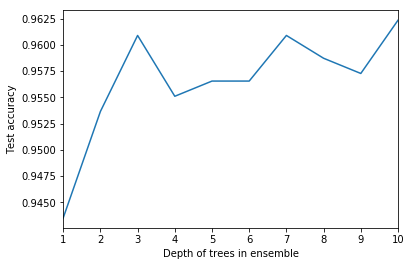

In [25]:
scores = {}
for depth in range(1, 11):
    model = GradientBoostingClassifier(n_estimators=200, max_depth=depth, random_state=1)
    model.fit(X_train, y_train)
    prediction_test = model.predict(X_test)
    accuracy_test = metrics.accuracy_score(y_test, prediction_test)
    scores[depth] = accuracy_test
Series(scores).sort_index().plot()
xlabel('Depth of trees in ensemble')
ylabel('Test accuracy')

Trees of depth 3 seem to be enough.

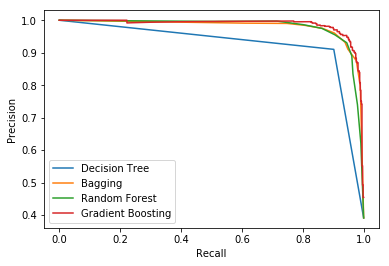

In [26]:
from sklearn.metrics import precision_recall_curve

for index, (name, model) in enumerate(model_list):
    predictions = model.predict_proba(X_test)
    precision, recall, thresholds = precision_recall_curve(y_test, predictions[:, 1])
    plot(recall, precision, label=name)

xlabel('Recall')
ylabel('Precision')
legend(loc='best')
savefig('Classification_5_data/precrec.png')